**<span style="color:#A03;font-size:20pt">
&#x1f4dd; Chemical Structure Alignment
</span>**

Molecular alignment is a fundamental problem in cheminformatics and can be used for  structure  determination,  similarity  based  searching, and ligand-based drug design. This problem can be formulated as an orthogonal Procrustes problem where the two matrices represent three-dimensional Cartesian coordinates of molecules.

>**<span style="color:#A03;font-size:12pt">
>Orthogonal Procrustes
></span>**
>
> Given matrix $\mathbf{A}_{m \times n}$ and a reference $\mathbf{B}_{m \times n}$, find the find the orthogonal transformation matrix $\mathbf{Q}_{n \times n}$ that makes $\mathbf{A}$ as close as possible to $\mathbf{B}$, i.e.,
>
\begin{equation}
       \underbrace{\min}_{\left\{\mathbf{Q} | \mathbf{Q}^{-1} = {\mathbf{Q}}^\dagger \right\}}
                          \|\mathbf{A}\mathbf{Q} - \mathbf{B}\|_{F}^2
\end{equation}


In the code block below, we use the `procrustes` library for protein structure alignment of 2HHB which has cyclic-$C_2$ global symmetry. The 3D-Cartesian coordinates of 2HHB protein is obtained by loading its PDB file using [IOData library](https://github.com/theochem/iodata). In 2HHB, chains A and C (or chains B and D) are hemoglobin deoxy-alpha (beta) chains as shown in see **Fig. (i)**, and their $C_{\alpha}$ atoms in **Fig. (ii)** are aligned in **Fig. (iii)** to show that they are homologous. The results in **Fig. (iii)** are obtained with orthogonal Procrustes which implements the *Kabsch* algorithm. The root-mean-square deviation (RMSD) is used to assess the discrepancy between structures before and after the translation-rotation transformation.


![Fig. 1. protein structure alignment with rotational Procrustes.](notebook_data/chemical_strcuture_alignment/protein_alignment.png "Fig. 1. protein structure alignment with rotational Procrustes.")

In [1]:
# chemical structure alignment with orthogonal Procrustes

import numpy as np
    
from iodata import load_one
from iodata.utils import angstrom
from procrustes import rotational

# load PDB
pdb = load_one("notebook_data/chemical_strcuture_alignment/2hhb.pdb")

# get coordinates of C_alpha atoms in chains A & C (in angstrom)
chainid = pdb.extra['chainids']
attypes = pdb.atffparams['attypes']
# alpha carbon atom coordinates in chain A
ca_a = pdb.atcoords[(chainid == 'A') & (attypes == 'CA')] / angstrom
# alpha carbon atom coordinates in chain A
ca_c = pdb.atcoords[(chainid == 'C') & (attypes == 'CA')] / angstrom


rmsd_before = np.sqrt(np.mean(np.sum((ca_a - ca_c)**2, axis=1)))
print("RMSD of initial coordinates:", rmsd_before)


result = rotational(ca_a, ca_c, translate=True)

# compute transformed (translated & rotated) coordinates of chain A
ca_at = np.dot(result.new_a, result.t)

# now new_A is the array after rotation
rmsd_after = np.sqrt(np.mean(np.sum((ca_at - result.new_b)**2, axis=1)))
print("RMSD of transformed coordinates:", rmsd_after)

RMSD of initial coordinates: 39.46851987559469
RMSD of transformed coordinates: 0.23003870483785005


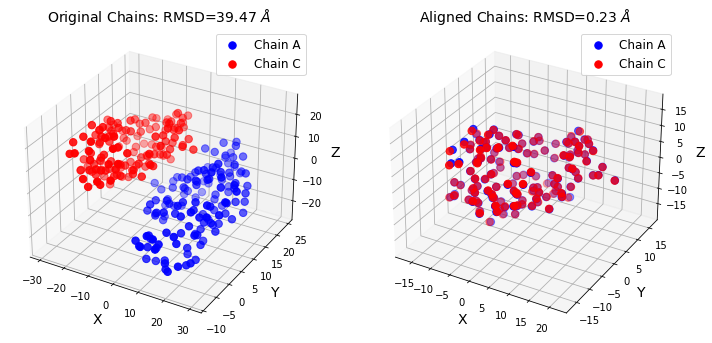

In [2]:
# Plot outputs of Procrustes

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# coordinates of chains A & C (before alignment)
coords1, coords2 = ca_a, ca_c
title = "Original Chains: RMSD={:0.2f} $\AA$".format(rmsd_before)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="Chain A")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="Chain C")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# coordinates of chains A & C after translation and rotation
coords1, coords2 = ca_at, result.new_b
title="Aligned Chains: RMSD={:0.2f} $\AA$".format(rmsd_after)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="Chain A")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="Chain C")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)

plt.show()